# Chat messages sentiment analysis 

### Basic data check

In [1]:
import numpy as np
import pandas as pd

In [2]:
chat_df = pd.read_csv('data/topical_chat.csv')
chat_df.head()

,conversation_id,message,sentiment
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper
1,1,Both are excellent technology they are helpfu...,Curious to dive deeper
2,1,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper
3,1,Google provides online related services and p...,Curious to dive deeper
4,1,"Yeah, their services are good. I'm just not a...",Curious to dive deeper


In [3]:
chat_df["message"][1]

' Both are excellent technology they are helpful in many ways. For the security purpose both are super.'

In [4]:
chat_df["sentiment"].value_counts()

 Curious to dive deeper    80888
 Neutral                   41367
 Surprised                 30638
 Happy                     29617
 Sad                        2533
 Disgusted                  1433
 Fearful                    1026
 Angry                       876
Name: sentiment, dtype: int64

<AxesSubplot: >

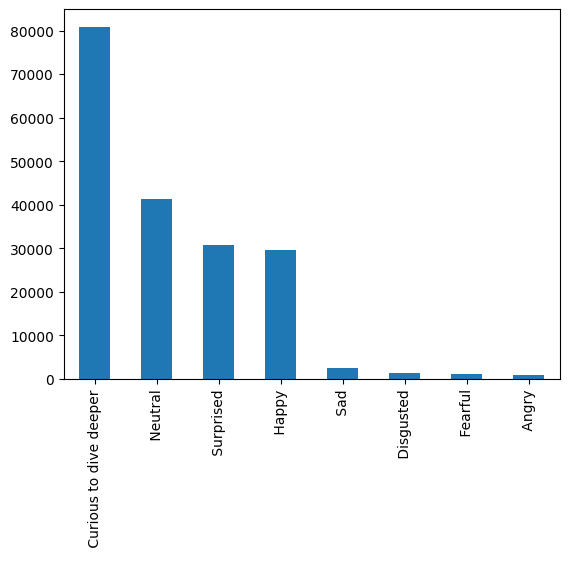

In [5]:
chat_df["sentiment"].value_counts().plot(kind="bar")

In [6]:
chat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188378 entries, 0 to 188377
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   conversation_id  188378 non-null  int64 
 1   message          188378 non-null  object
 2   sentiment        188378 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.3+ MB


In [7]:
chat_df.isnull().sum()

conversation_id    0
message            0
sentiment          0
dtype: int64

In [8]:
chat_df.duplicated().sum()

30

In [9]:
chat_df.drop_duplicates(inplace=True)

<AxesSubplot: ylabel='Frequency'>

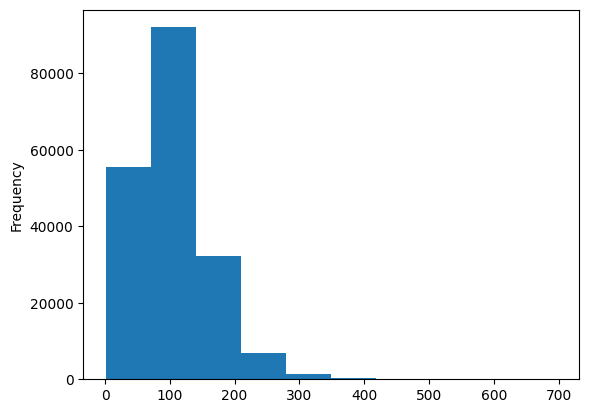

In [10]:
chat_df["message"].str.len().plot(kind="hist")

### Basic preprocessing

In [11]:
chat_df["message"] = chat_df["message"].str.lower()

In [12]:
chat_df.head()

,conversation_id,message,sentiment
0,1,are you a fan of google or microsoft?,Curious to dive deeper
1,1,both are excellent technology they are helpfu...,Curious to dive deeper
2,1,"i'm not a huge fan of google, but i use it a...",Curious to dive deeper
3,1,google provides online related services and p...,Curious to dive deeper
4,1,"yeah, their services are good. i'm just not a...",Curious to dive deeper


In [13]:
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')

chat_df["message"] = chat_df["message"].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords_list]))
chat_df.head()

,conversation_id,message,sentiment
0,1,fan google microsoft?,Curious to dive deeper
1,1,excellent technology helpful many ways. securi...,Curious to dive deeper
2,1,"i'm huge fan google, use lot to. think monopol...",Curious to dive deeper
3,1,google provides online related services produc...,Curious to dive deeper
4,1,"yeah, services good. i'm fan intrusive persona...",Curious to dive deeper


In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/gorbart/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'[\w\']+')

chat_df["message"] = chat_df["message"].apply(tokenizer.tokenize)
chat_df["message"]


0                                  [fan, google, microsoft]
1         [excellent, technology, helpful, many, ways, s...
2         [i'm, huge, fan, google, use, lot, to, think, ...
3         [google, provides, online, related, services, ...
4         [yeah, services, good, i'm, fan, intrusive, pe...
                                ...                        
188373    [wow, seem, like, long, since, mentioned, simp...
188374    [havent, seen, episode, might, google, later, ...
188375    [think, either, that's, insane, amount, episod...
188376    [did, little, brother, used, love, thomas, tan...
188377    [did, ringo, starr, george, carlin, alec, bald...
Name: message, Length: 188348, dtype: object

In [16]:

all_tokens = [token for tokens in chat_df["message"] for token in tokens]

chat_freq = FreqDist(all_tokens)
chat_freq.most_common(15)

[('know', 31874),
 ('like', 30100),
 ('think', 19517),
 ('would', 19120),
 ('yeah', 16203),
 ('good', 14126),
 ('yes', 13862),
 ('one', 12779),
 ('really', 11029),
 ('that', 10807),
 ("that's", 10590),
 ('wonder', 10131),
 ('lol', 9733),
 ('well', 9556),
 ('you', 9513)]

In [17]:
total_words = len(chat_freq.keys())
total_words

38731

In [19]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
chat_df["message"] = chat_df["message"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
chat_df.head()

[nltk_data] Downloading package wordnet to /Users/gorbart/nltk_data...


,conversation_id,message,sentiment
0,1,"[fan, google, microsoft]",Curious to dive deeper
1,1,"[excellent, technology, helpful, many, way, se...",Curious to dive deeper
2,1,"[i'm, huge, fan, google, use, lot, to, think, ...",Curious to dive deeper
3,1,"[google, provides, online, related, service, p...",Curious to dive deeper
4,1,"[yeah, service, good, i'm, fan, intrusive, per...",Curious to dive deeper


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
chat_df["sentiment"] = label_encoder.fit_transform(chat_df["sentiment"])
chat_df["message"] = chat_df["message"].apply(lambda x: ' '.join(x))
X_train, X_test, y_train, y_test = train_test_split(chat_df["message"], chat_df["sentiment"], test_size=0.2, random_state=42)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_bigrams = TfidfVectorizer(ngram_range=(1,2))
X_train_bigrams = vectorizer_bigrams.fit_transform(X_train)
X_test_bigrams = vectorizer_bigrams.transform(X_test)

AttributeError: 'list' object has no attribute 'lower'